#### [시도별 전출입 인구수 분석- Metplotlib]
- 데이터셋: 1970~ 2017년까지 인구이동수
- 대구의 타지역 이동 인구수 분석
- 전국의 인구 이동수에 대한 분석
- 과정
    * 데이터파일 확인 => 첫번째 줄이 컬럼명이 맞는지, 불필요한 컬럼이나 행이 있는지
                     => 결측치가 있는지 확인
    * 전처리
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
    * 가공: 분석하고자 하는 데이터 형태 
        - 행인덱스 처리: 멀티인덱스/컬럼 ->행/열인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
    * 데이터 분석
        - 탐색적 분석: 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리



- [1] 준비과정:모듈, 데이터

In [2]:
# [1] 모듈 로딩
import pandas as pd                 #데이터 분석용 모듈
import matplotlib.pyplot as plt     #데이터 시각화 모듈
from matplotlib import font_manager as fm
from matplotlib import rc
import seaborn as sns

In [3]:
font= r'C:\Windows\Fonts\batang.ttc'
# 폰트 패밀리
font_name= fm.FontProperties(fname=font).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

In [4]:
# [1-2] 데이터 준비
F_Data= r'C:\Users\KDP-25\Desktop\EX_PANDAS06\data\시도별 전출입 인구수.xlsx'

In [5]:
# [1-3] DataFrame 저장
DataDF= pd.read_excel(F_Data)

[2] 데이터 확인: 행,컬럼수 및 타입, 결측치, 실제 데이터 체

In [6]:
# [2-1] 기본 정보 확인 => info(), describe()
# 행수 컬럼수 컬럼별 non-null 데이터 수 컬럼별 데이터 타입
# 메모리 사용량
DataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [7]:
# [2-1] 기본 정보 확인 => info(), describe()
# - 수치 데이터 컬럼의 데이터 분포 확인: 최대,최소,표편, 사분위수, 평균...
# - 범주 데이터 컬럼의 데이터 분포 확인: 고유값, 최빈값, 최빈값 빈도수...
DataDF.describe(include='all')

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [8]:
# [2-3] 실제데이터 info()에서 확인한 타입 비교=> head()/tail()
DataDF.head()
# 0번행 삭제, 전출지별 결측치 처리, -으로 되있는 데이터 처리....

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [9]:
### 기본 정보 확인 후 결과
# - 불필요한 행/컬럼: 0번행 삭제
# - 결측치: '전출치별'컬럼,
# - 이상치: 행별로 '-'값이 수치값과 섞여 있음


- [3] 데이터 전처리
    * 기본확인 파악된 내용들 처리
    * 불필요 데이터 삭제: 0번행 삭제
    * 결측치 데이터 처리: '전출지별' 컬럼 처리
    * 이상치 데이터 처리: '-'에 대한 처리
    * 데이터 자료형 일치: 형변환

In [10]:
# [3-1] 불필요 데이터 처리
copyDF= DataDF.drop(index=0)
copyDF.head(3)            #인덱스가 1부터 시작하게됨

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073


In [11]:
# [3-2] 결측치 데이터 처리 => isna(), isnull()
copyDF.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [12]:
# 1984, 1985, 1986 컬럼만 추출
index= copyDF[['1984', '1985', '1986']].isna()  #결측치만 True(1) 로 변환
index[index.sum(axis='columns')>0]                     #전부 정상치면 세 컬럼의 합이 0, 하나라도 결측치가 있으면 1이상
# copyDF[index.sum(axis='columns')>0]
# fixDF= index[index.sum(axis='columns')>0].fillna(0)



,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [13]:
# 전출지별 처리
copyDF['전출지별'].ffill(inplace=True)

#수치데이터 결측치 처리(워닝 지우기) ->downcasting 워닝
pd.set_option('future.no_silent_downcasting', True)
copyDF.fillna(0, inplace=True)

C:\Users\KDP-25\AppData\Local\Temp\ipykernel_11280\1173919954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copyDF['전출지별'].ffill(inplace=True)


In [14]:
copyDF[['1984', '1985', '1986']]=copyDF[['1984', '1985', '1986']].fillna(0)

#warning -->뜰시 inplace하지 말고 이런 형식으로 교체하기

In [15]:
# [3-3] 이상치 데이터 처리
copyDF.replace('-', 0, inplace=True)

In [16]:
# [3-4] 자료형 반환
# 열이 많아서 열명 일일이 int변환하기 힘드니까 한번
# 전입전출 제외 하고 48개 컬럼 인트로 형변환 
d_= dict(zip(copyDF.columns[2:].to_list(), ['int']*(copyDF.shape[1]-2)))
copyDF=copyDF.astype(d_)

- [4] 데이터 가공
    - 대구에서 전지역 전입 인구수 분석
    - 전출지별- '대구광역시'
    - 전입지별- '대구광역시','전국' 제외

In [17]:
# 대구광역시 데이터만 추출
mask= copyDF['전출지별']=='대구광역시'
cityDF=copyDF[mask]
cityDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [18]:
# 전출지별 컬럼 삭제
cityDF=cityDF.drop('전출지별', axis=1)

# 전입지별 컬럼 행 인덱스 설정
cityDF.set_index('전입지별', inplace=True)

In [19]:
# 대구광역시, 전국 행 삭제
cityDF.drop(['전국', '대구광역시'], inplace=True)

- [5] 분석: 대구에서 전지역 전입 인구수 분석 
- 시별, 도별 ---> 연도별 

In [20]:
cityDF.index.to_list(),  cityDF.columns.to_list()

(['서울특별시',
  '부산광역시',
  '인천광역시',
  '광주광역시',
  '대전광역시',
  '울산광역시',
  '세종특별자치시',
  '경기도',
  '강원도',
  '충청북도',
  '충청남도',
  '전라북도',
  '전라남도',
  '경상북도',
  '경상남도',
  '제주특별자치도'],
 ['1970',
  '1971',
  '1972',
  '1973',
  '1974',
  '1975',
  '1976',
  '1977',
  '1978',
  '1979',
  '1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017'])

In [21]:
cityDF.loc['서울특별시']['2017']

13011

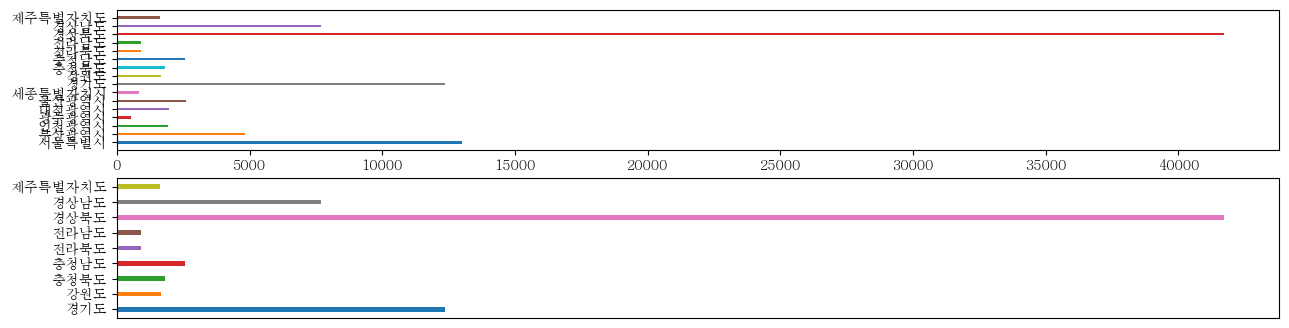

In [44]:
year= (input('확인할 연도를 입력하세요'))
# ax1, ax2= fig.subplots(2,1, sharey=True)??


fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(2,1, 1)
for idx in cityDF.index.to_list()[:]:
    ax1.barh(idx, cityDF.loc[idx][year], height=0.3,label=idx)

ax2=fig.add_subplot(2,1, 2)
for idx in cityDF.index.to_list()[7:]:
    ax2.barh(idx, cityDF.loc[idx][year], height=0.3,label=idx)
ax2.set_xticks([])

plt.show()

In [36]:
#test

year= (input('확인할 연도를 입력하세요'))


ax1, ax2= fig.subplots(2,1, sharey=True)

for idx in cityDF.index.to_list()[:7]:
    ax1.barh(idx, cityDF.loc[idx][year], height=0.3,label=idx)


for idx in cityDF.index.to_list()[7:]:
    ax2.barh(idx, cityDF.loc[idx][year], height=0.3,label=idx)
ax1.sharey()

plt.show()

TypeError: sharey() missing 1 required positional argument: 'other'

--------------------------------

In [ ]:
df2= pd.DataFrame([[1,1,pd.NA], [pd.NA,pd.NA, 2], [pd.NA,3,3]])

In [ ]:
# 0번 컬럼을 이전 행 값으로 채우기
a= df2[0].ffill(inplace=True)   #원본을 교체하고 None반환 
print(a,df2, sep='\n')

None
   0     1     2
0  1     1  <NA>
1  1  <NA>     2
2  1     3     3


C:\Users\KDP-25\AppData\Local\Temp\ipykernel_8724\859797139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a= df2[0].ffill(inplace=True)   #원본을 교체하고 None반환
C:\Users\KDP-25\AppData\Local\Temp\ipykernel_8724\859797139.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a= df2[0].ffill(inplace=True)   #원본을 교체

In [ ]:
df2[[1,2]].ffill(inplace=True)       #데이터 프레임을 뽑아서 ffill-> 적용안됨
df2

C:\Users\KDP-25\AppData\Local\Temp\ipykernel_8724\2420423881.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[[1,2]].ffill(inplace=True)       #데이터 프레임을 뽑아서 ffill-> 적용안됨
C:\Users\KDP-25\AppData\Local\Temp\ipykernel_8724\2420423881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[[1,2]].ffill(inplace=True)       #데이터 프레임을 뽑아서 ffill-> 적용안됨


,0,1,2
0,1,1,<NA>
1,1,<NA>,2
2,1,3,3


In [ ]:
a= df2[[1,2]].ffill()      
df2[[1,2]]=a
df2

C:\Users\KDP-25\AppData\Local\Temp\ipykernel_8724\479461145.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a= df2[[1,2]].ffill()       #데이터 프레임을 뽑아서 ffill-> 적용안됨
